## Q-Learning Algorithm


In [1]:
import sys
sys.path.append('/home/gabe/.local/lib/python3.8/site-packages')

In [2]:
import numpy as np
import gym
import random
import time
from IPython.display import clear_output
%matplotlib inline
import seaborn
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
env = gym.make("FrozenLake-v0")

In [4]:
def learning_chart(rewards_from_all_episodes,num_episodes,rate):
    
    rewards_register = []
    rewards_per_thousand_episodes = np.split(np.array(rewards_from_all_episodes),num_episodes/rate)
    count = rate
    print("**Average reward per thousand episodes**\n")
    for r in rewards_per_thousand_episodes:
        rewards_register.append(sum(r/rate))
        print(count,":",str(sum(r/rate)))
        count += rate
        
    plt.plot(rewards_register)
    plt.ylabel('Rewards per 1000 episodes')
    plt.xlabel('Thousand episodes')
    plt.show()

In [5]:
def print_table(table_name, table):
    print("\n\n***** " + table_name +" *****\n")
    print(table)

In [6]:
def q_learning_algo(action_space_size,state_space_size,num_episodes, max_steps_per_episode, \
                       learning_rate, discount_rate, exploration_rate, max_exploration_rate, \
                        min_exploration_rate, exploration_decay_rate):
    
    rewards_all_episodes = []
    q_table = np.zeros((state_space_size, action_space_size))
    
    for episode in range(num_episodes):
        
        state = env.reset() 
        done = False
        rewards_current_episode = 0
    
        # a Step is a single timestep within an episode
        for step in range(max_steps_per_episode):
        
            exploration_rate_threshold = random.uniform(0,1)
            if exploration_rate_threshold > exploration_rate:
                action = np.argmax(q_table[state,:])
            else:
                action = env.action_space.sample()
            
            new_state, reward, done, info = env.step(action)
        
            #Update Q-Table for Q(s,a)
            q_table[state,action] = q_table[state,action] * (1 - learning_rate) + \
                learning_rate * (reward + discount_rate * np.max(q_table[new_state,:]))
        
            state = new_state
            rewards_current_episode += reward
        
            if done == True:
                break
            
        exploration_rate = min_exploration_rate + \
            (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate*episode)

        rewards_all_episodes.append(rewards_current_episode)
    
    return(rewards_all_episodes, q_table)
    
    


In [7]:
print("Starting: " + str(datetime.now()))
starting = datetime.now()

full_rewards, q = q_learning_algo(env.action_space.n, env.observation_space.n,100000,100,0.1,0.99,1,1,0.01,0.001)

it_took = datetime.now() - starting
print("Ended: " + str(datetime.now()))
print("It took:" + str(it_took))

Starting: 2021-04-25 14:47:08.951967
Ended: 2021-04-25 14:48:04.433561
It took:0:00:55.481391


**Average reward per thousand episodes**

1000 : 0.048000000000000036
2000 : 0.19800000000000015
3000 : 0.3900000000000003
4000 : 0.5470000000000004
5000 : 0.6530000000000005
6000 : 0.6410000000000005
7000 : 0.6570000000000005
8000 : 0.6850000000000005
9000 : 0.6330000000000005
10000 : 0.6560000000000005
11000 : 0.6930000000000005
12000 : 0.6930000000000005
13000 : 0.6840000000000005
14000 : 0.7000000000000005
15000 : 0.6710000000000005
16000 : 0.6700000000000005
17000 : 0.6840000000000005
18000 : 0.6580000000000005
19000 : 0.6710000000000005
20000 : 0.7020000000000005
21000 : 0.6490000000000005
22000 : 0.7000000000000005
23000 : 0.6660000000000005
24000 : 0.6710000000000005
25000 : 0.6530000000000005
26000 : 0.6700000000000005
27000 : 0.6580000000000005
28000 : 0.6580000000000005
29000 : 0.6830000000000005
30000 : 0.6950000000000005
31000 : 0.6560000000000005
32000 : 0.6720000000000005
33000 : 0.7110000000000005
34000 : 0.6680000000000005
35000 : 0.6500000000000005
36000 : 0.694000000

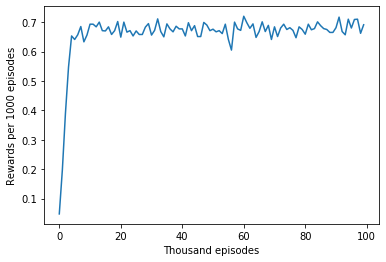

In [8]:
learning_chart(full_rewards,100000,1000)

In [ ]:
print_table("q_table",q)

In [ ]:
def fancy_visual(value_func,policy_int,size):    
    grid = size
    f, ax = plt.subplots(figsize=(11, 9))
    cmap = seaborn.diverging_palette(220, 10, as_cmap=True)
    reshaped=np.reshape(value_func,(grid,grid))
    seaborn.heatmap(reshaped, cmap=cmap, vmax=1.1,
                square=True, xticklabels=grid+1, yticklabels=grid+1,
                linewidths=.5, cbar_kws={"shrink": .5}, ax=ax, annot=True, fmt="f")
    counter=0
    for j in range(0, size):
        for i in range(0, size):
            if policy_int[counter]==1:
                plt.text(i+0.5, j+0.7, u'\u2193', fontsize=12)
            elif policy_int[counter]==3:
                plt.text(i+0.5, j+0.7, u'\u2191', fontsize=12)
            elif policy_int[counter]==0:
                plt.text(i+0.5, j+0.7, u'\u2190', fontsize=12)
            else:
                plt.text(i+0.5, j+0.7, u'\u2192', fontsize=12)
            counter=counter+1

    plt.title('Heatmap of policy iteration with value function values and directions')
    print('Value Function',value_func)
    print('Policy',policy_int)
    plt.show()

In [ ]:
#Visualize Agent training for the first 5 iterations

for episode in range(5):
    state =  env.reset()
    done = False
    print("** Episode ", episode+1, "**\n\n\n\n")
    time.sleep(1)
    
    for step in range(max_steps_per_episode):
        clear_output(wait = True)
        env.render()
        time.sleep(0.3)
        
        action = np.argmax(q[state,:])
        new_state, reward, done, info = env.step(action)
        
        if done:
            clear_output(wait=True)
            env.render()
            if reward == 1:
                print("**You reached the goal!**")
                time.sleep(3)
            else:
                print("**You fell through a hole!**")
                time.sleep(3)
            clear_output(wait=True)
            break
            
        state = new_state
        
env.close()